In [1]:
pip install seaborn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


C:\Users\DKHBS\AppData\Local\Temp\ipykernel_1784\2767557873.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x=x_variable, y="Value", hue="Substance", err_style="band", ci="sd")
C:\Users\DKHBS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DKHBS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DKHBS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_catego

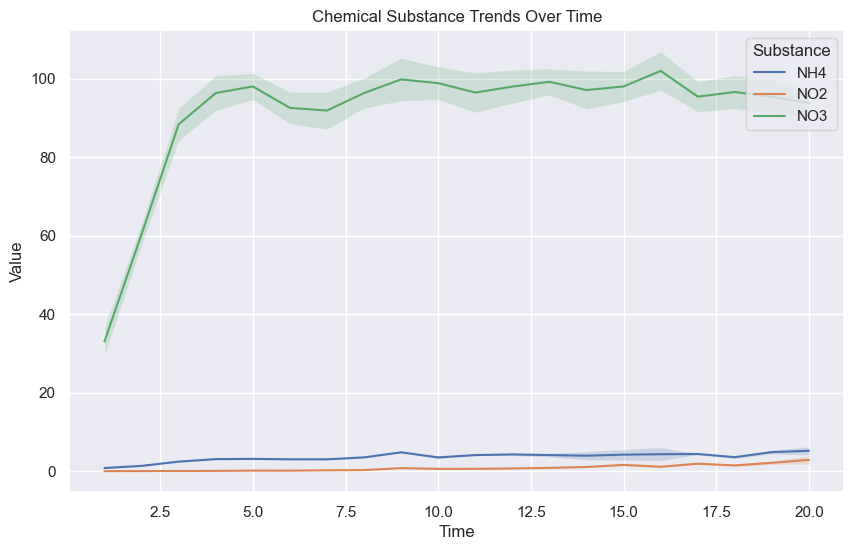

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 导入数据
data = pd.read_excel('G:/Temp/1.xlsx')  # 替换成您的数据文件路径

# 提取时间列
x_variable = 'time'

# 提取 NH4、NO2 和 NO3 列
y_columns = ['NH4', 'NO2', 'NO3']

# 提取误差列
error_columns = ['error_NH4', 'error_NO2', 'error_NO3']

# 创建一个长格式数据集
df = pd.melt(data, id_vars=x_variable, value_vars=y_columns, var_name="Substance", value_name="Value")


# 以长格式模式传递整个数据集将对重复的值进行聚合，以显示平均值和误差线
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=x_variable, y="Value", hue="Substance", err_style="band", ci="sd")
plt.title("Chemical Substance Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(title="Substance")
plt.legend(title="Substance", bbox_to_anchor=(1, 1), loc='upper right')

# 添加误差线
for i, substance in enumerate(y_columns):
    plt.fill_between(data[x_variable], data[substance] - data[error_columns[i]], data[substance] + data[error_columns[i]], alpha=0.2)
    
plt.savefig('yang_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [32]:
pip install pygame

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/82/61/93ae7afbd931a70510cfdf0a7bb0007540020b8d80bc1d8762ebdc46479b/pygame-2.5.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 109.3 kB/s eta 0:01:39
   ---------------------------------------- 0.1/10.8 MB 163.6 kB/s eta 0:01:06
   ---------------------------------------- 0.1/10.8 MB 163.6 kB/s eta 0:01:06
   ---------------------------------------- 0.1/10.8 MB 163.6 kB/s 

In [1]:
import pygame
import random

# 初始化 Pygame
pygame.init()

# 游戏参数
width, height = 400, 400
snake_size = 20
snake_speed = 15

# 颜色
white = (255, 255, 255)
red = (255, 0, 0)
green = (0, 255, 0)

# 创建屏幕
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Snake Game")

# 初始化蛇
snake = [(100, 50), (90, 50), (80, 50)]
snake_direction = "RIGHT"
change_to = snake_direction
score = 0

# 初始化食物
food_position = [random.randrange(1, (width//snake_size)) * snake_size,
                 random.randrange(1, (height//snake_size)) * snake_size]

# 游戏结束函数
def game_over():
    myFont = pygame.font.SysFont('times new roman', 90)
    game_over_surface = myFont.render('Your Score is: ' + str(score), True, white)
    game_over_rect = game_over_surface.get_rect()
    game_over_rect.midtop = (width/2, height/4)
    screen.fill(white)
    screen.blit(game_over_surface, game_over_rect)
    pygame.display.flip()
    
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
# 游戏主循环
while True:
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                change_to = "UP"
            if event.key == pygame.K_DOWN:
                change_to = "DOWN"
            if event.key == pygame.K_LEFT:
                change_to = "LEFT"
            if event.key == pygame.K_RIGHT:
                change_to = "RIGHT"

    # 确保蛇不朝相反方向移动
    if change_to == "UP" and not snake_direction == "DOWN":
        snake_direction = "UP"
    if change_to == "DOWN" and not snake_direction == "UP":
        snake_direction = "DOWN"
    if change_to == "LEFT" and not snake_direction == "RIGHT":
        snake_direction = "LEFT"
    if change_to == "RIGHT" and not snake_direction == "LEFT":
        snake_direction = "RIGHT"

    # 移动蛇头
    if snake_direction == "UP":
        snake_head = (snake[0][0], snake[0][1] - snake_size)
    if snake_direction == "DOWN":
        snake_head = (snake[0][0], snake[0][1] + snake_size)
    if snake_direction == "LEFT":
        snake_head = (snake[0][0] - snake_size, snake[0][1])
    if snake_direction == "RIGHT":
        snake_head = (snake[0][0] + snake_size, snake[0][1])

    snake.insert(0, snake_head)

    # 判断是否吃到食物
    if snake[0] == food_position:
        score += 1
        food_position = [random.randrange(1, (width//snake_size)) * snake_size,
                         random.randrange(1, (height//snake_size)) * snake_size]
    else:
        snake.pop()

    # 游戏结束条件
    if (snake[0][0] >= width or snake[0][0] < 0 or
        snake[0][1] >= height or snake[0][1] < 0 or
        snake[0] in snake[1:]):
        game_over()

    # 更新屏幕
    screen.fill(white)
    for pos in snake:
        pygame.draw.rect(screen, green, pygame.Rect(pos[0], pos[1], snake_size, snake_size))
    pygame.draw.rect(screen, red, pygame.Rect(food_position[0], food_position[1], snake_size, snake_size))
    pygame.display.update()

      # 控制游戏速度
    pygame.time.Clock().tick(snake_speed)
    
    screen = pygame.display.set_mode((width, height))

    pygame.draw.rect(screen, color, pygame.Rect(x, y, width, height))


pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'color' is not defined